In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
import pickle
import os

In [2]:
config_path = "config.yml"
with open(config_path, "r") as handle:
    config = yaml.load(handle, Loader=yaml.FullLoader)
resultsdir = config["resultsdir"]
precision_scores_path = os.path.join(resultsdir, "precision_scores.pkl")
recall_scores_path = os.path.join(resultsdir, "recall_scores.pkl")

with open(precision_scores_path, "rb") as handle:
    prec_data = pickle.load(handle)

with open(recall_scores_path, "rb") as handle:
    rec_data = pickle.load(handle)

colors = config["colors"]
print(colors)
methods = config["methods"]
print(methods)
datpath = config["datapath"]

sample_ids = os.listdir(os.path.join(datpath, methods[0]))
sample_ids = [s.split(".")[0] for s in sample_ids]
radii = config["radii"]

# ["mesmer", "stardist", "maskrcnn", "cellpose", "unet", "unmicst"]

['purple', 'red', 'green', 'gold', 'pink', 'blue']
['mesmer', 'stardist', 'maskrcnn', 'cellpose', 'unet', 'unmicst']


In [3]:
sns.set(
    font='Franklin Gothic Book',
    rc={'axes.axisbelow': False,
        'axes.edgecolor': 'grey',
        'axes.facecolor': 'None',
        'axes.grid': False,
        'axes.labelcolor': 'grey',
        'axes.spines.right': True,
        'axes.spines.top': True,
        'figure.facecolor': 'white',
        'lines.solid_capstyle': 'round',
        'patch.edgecolor': 'w',
        'patch.force_edgecolor': True,
        'text.color': 'grey',
        'xtick.bottom': False,
        'xtick.color': 'grey',
        'xtick.direction': 'out',
        'xtick.top': False,
        'ytick.color': 'grey',
        'ytick.direction': 'out',
        'ytick.left': False,
        'ytick.right': False}
)
sns.set_context("notebook", rc={"font.size":18,
                                "axes.titlesize":18,
                                "axes.labelsize":18})

names = {
    "mesmer": "Mesmer",
    "stardist": "StarDist",
    "unet": "U-Net",
    "cellpose": "CellPose",
    "maskrcnn": "Mask-RCNN", 
    "unmicst": "UnMicst"
}

In [4]:
points = dict((m, []) for m in methods)

for sid in sample_ids:
    for i, rad in enumerate(radii):
        for m in methods:
            p = prec_data[sid][rad][m]
            r = rec_data[sid][rad][m]
            points[m].append((r, p))

In [5]:
prec_data

{'OHSU_TMA1_004-A1': {2: {'mesmer': 0.8203559163284421,
   'stardist': 0.8701908512571948,
   'maskrcnn': 0.7744400681911704,
   'cellpose': 0.6828722213337598,
   'unet': 0.5673110113910942,
   'unmicst': 0.5468568727710222},
  4: {'mesmer': 0.5232132208876394,
   'stardist': 0.8432258064516129,
   'maskrcnn': 0.5476340127502918,
   'cellpose': 0.5935189873417721,
   'unet': 0.7256469904041872,
   'unmicst': 0.7753611684394348},
  6: {'mesmer': 0.6644965277777778,
   'stardist': 0.6104461371055495,
   'maskrcnn': 0.7654255319148936,
   'cellpose': 0.7847619047619048,
   'unet': 0.8366666666666667,
   'unmicst': 0.9001814882032668},
  8: {'mesmer': 0.793233082706767,
   'stardist': 0.7733050847457628,
   'maskrcnn': 0.876967095851216,
   'cellpose': 0.8164464023494861,
   'unet': 0.8636363636363636,
   'unmicst': 0.8720538720538721},
  10: {'mesmer': 0.8140845070422535,
   'stardist': 0.8325024925224327,
   'maskrcnn': 0.86875,
   'cellpose': 0.881578947368421,
   'unet': 0.92727272727

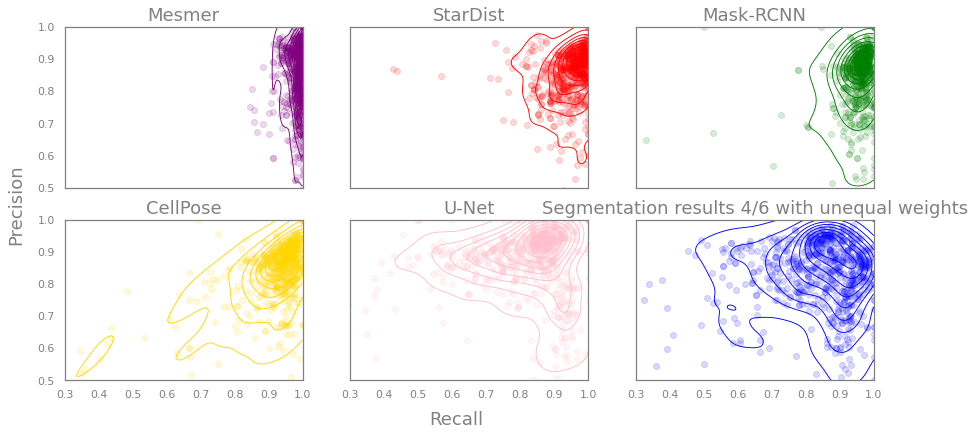

In [9]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.set_figheight(6.5)
fig.set_figwidth(14.5)

fig.text(0.5, 0.03, 'Recall', ha='center')
fig.text(0.07, 0.5, 'Precision', va='center', rotation='vertical')

'''
for i, m in enumerate(methods):
    row = 0 if i < 3 else 1
    c = colors[i]
    if i >= 3:
        i -= 3
    ax[row][i].set_xlim(0.3, 1)
    ax[row][i].set_ylim(0.5, 1)
    ax[row][i].set_title(names[m])
    xs = list(map(lambda x : x[0], points[m]))
    ys = list(map(lambda x : x[1], points[m]))
    sns.kdeplot(x=xs, y=ys, colors=c, clip=(0,1), ax=ax[row][i], **{"linewidths":0.9})
    for x, y in list(zip(xs, ys)):
        ax[row][i].scatter(x, y, color=c, alpha=0.15)
    #    ax[1][2].scatter(x, y, color=colors[i], alpha=0.3)
'''

# Added by Dharani

plot_loc = {"mesmer":[0, 0, 0], "stardist":[1, 0, 1], "maskrcnn":[2, 0, 2], "cellpose":[3, 1, 0], "unet":[4, 1, 1], "unmicst":[5, 1, 2]}

for keys, values in plot_loc.items():
    if keys in methods:
        c = colors[values[0]]
        ax[values[1]][values[2]].set_xlim(0.3, 1)
        ax[values[1]][values[2]].set_ylim(0.5, 1)
        ax[values[1]][values[2]].set_title(names[keys])
        xs = list(map(lambda x : x[0], points[keys]))
        ys = list(map(lambda x : x[1], points[keys]))
        sns.kdeplot(x=xs, y=ys, colors=c, clip=(0,1), ax=ax[values[1]][values[2]], **{"linewidths":0.9})
        for x, y in list(zip(xs, ys)):
            ax[values[1]][values[2]].scatter(x, y, color=c, alpha=0.15)

plt.savefig("scatterplot_unequal_weights_0.66.png")
    

In [ ]:
offsets = [-0.5, -0.25, 0, 0.25, 0.5, 0.75]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

all_precs = dict((rad, []) for rad in radii)
all_recs = dict((rad, []) for rad in radii)

for name in methods:
    
    precisions = dict((rad, []) for rad in radii)
    recalls = dict((rad, []) for rad in radii)
    
    for sid in sample_ids:
        
        for i, rad in enumerate(radii):

            p = prec_data[sid][rad][name]
            r = rec_data[sid][rad][name]
            precisions[rad].append(p)
            recalls[rad].append(r)
    
    for i, rad in enumerate(radii):
        all_precs[rad].append(precisions[rad])
        all_recs[rad].append(recalls[rad])

In [ ]:
fig = plt.figure(figsize=(24, 8))

for rad, data in all_precs.items():
    
    for i, d in enumerate(data):

        bpl = plt.boxplot(d, positions=[offsets[i] + rad], patch_artist=True, sym='', widths=0.1)
        set_box_color(bpl, colors[i])
        plt.ylabel("Precision")
        plt.xlabel("Dilation Radius")
        plt.xticks(radii, list(radii))
        
plt.plot([], c=colors[0], label=names[methods[0]])
plt.plot([], c=colors[1], label=names[methods[1]])
plt.plot([], c=colors[2], label=names[methods[2]])
plt.plot([], c=colors[3], label=names[methods[3]])
plt.plot([], c=colors[4], label=names[methods[4]])
plt.plot([], c=colors[5], label=names[methods[5]])

plt.legend(loc="lower right")

In [ ]:
fig = plt.figure(figsize=(24, 8))

for rad, data in all_recs.items():
    
    for i, d in enumerate(data):

        bpl = plt.boxplot(d, positions=[offsets[i] + rad], patch_artist=True, sym='', widths=0.1)
        set_box_color(bpl, colors[i])
        plt.ylabel("Recall")
        plt.xlabel("Dilation Radius")
        plt.xticks(radii, list(radii))
        
plt.plot([], c=colors[0], label=names[methods[0]])
plt.plot([], c=colors[1], label=names[methods[1]])
plt.plot([], c=colors[2], label=names[methods[2]])
plt.plot([], c=colors[3], label=names[methods[3]])
plt.plot([], c=colors[4], label=names[methods[4]])
plt.plot([], c=colors[5], label=names[methods[5]])

plt.legend(loc="lower right")

In [ ]:
"/home/groups/ChangLab/dharani/seg_eval/with_unmicst/HMS-TMA-TNP_results_all6/"